In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
# зафиксируем random_state 
RAND = 42

In [2]:
# Загрузим наши данные 
df = pd.read_csv('UCI_Credit_Card.csv')
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Предобработка данных

In [4]:
# Произведем предобработку наших данных
# Преведем называние столбцов к одному виду 

df.columns = df.columns.str.lower()

df = df.rename(columns = {'default.payment.next.month' : 'default_payment_next_month'})

In [5]:
df.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
df.default_payment_next_month.unique()

array([1, 0], dtype=int64)

In [7]:
# Наблюдаем, что часть ктаегориальных признаков является числовыми, 
# приведем их к изначальному категориальному виду (sex, education, marriage, default.payment.next.month)

status_default = {
    1: 'default',
    0: 'ok'
}

df.default_payment_next_month = df.default_payment_next_month.map(status_default)

In [8]:
df.default_payment_next_month.unique()

array(['default', 'ok'], dtype=object)

In [9]:
# Наблюдаем незнакомое значение 0, определим его как unknown (unk)

df.marriage.unique()

array([1, 2, 3, 0], dtype=int64)

In [10]:
# 1=married, 2=single, 3=others

marriage_values = {
    1: 'married',
    2: 'single',
    3: 'others',
    0: 'unk'
}
df.marriage = df.marriage.map(marriage_values)

In [11]:
df.marriage.unique()

array(['married', 'single', 'others', 'unk'], dtype=object)

In [12]:
np.sort(df.education.unique())

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [13]:
# (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown), 0 тоже припишем к unk

education_values = {
    1: 'graduate school',
    2: 'university',
    3: 'high school',
    4: 'unknown',
    5: 'unknown',
    6: 'unknown',
    0: 'unknown'    # 0,5,6 объединили в одну категорию, что в перспективе улучшит стабильность модели
}

df.education = df.education.map(education_values)

In [14]:
df.education.unique()

array(['university', 'graduate school', 'high school', 'unknown'],
      dtype=object)

In [15]:
sex_values = {
    1: 'male',
    2: 'female'
}

df.sex = df.sex.map(sex_values)

In [16]:
df.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,default
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,default
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,ok
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,ok
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,ok


In [17]:
# Перейдем к числовым столбцам
# В сводке не еаблюдается аномальных значений 

df.describe().round()

,id,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,...,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
mean,15000.0,167484.0,35.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,51223.0,...,47013.0,43263.0,40311.0,38872.0,5664.0,5921.0,5226.0,4826.0,4799.0,5216.0
std,8660.0,129748.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,73636.0,...,69349.0,64333.0,60797.0,59554.0,16563.0,23041.0,17607.0,15666.0,15278.0,17777.0
min,1.0,10000.0,21.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-165580.0,...,-157264.0,-170000.0,-81334.0,-339603.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,7501.0,50000.0,28.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3559.0,...,2666.0,2327.0,1763.0,1256.0,1000.0,833.0,390.0,296.0,252.0,118.0
50%,15000.0,140000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,22382.0,...,20088.0,19052.0,18104.0,17071.0,2100.0,2009.0,1800.0,1500.0,1500.0,1500.0
75%,22500.0,240000.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,67091.0,...,60165.0,54506.0,50190.0,49198.0,5006.0,5000.0,4505.0,4013.0,4032.0,4000.0
max,30000.0,1000000.0,79.0,8.0,8.0,8.0,8.0,8.0,8.0,964511.0,...,1664089.0,891586.0,927171.0,961664.0,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0


## Разведочный анализ (EDA)

В нашем случае целевой переменной будет является default_payment_next_month - факт дефолта по кредиту.
Проведем анализ целевой переменной для понимая зависимости факта дефолта от имеющихся параметров.

Гипотезы:
* Уровень образования человека влият на возварт кредита, люди с вышим образованием чаще являются надежными заемщиками.
* Люди среднего возрастат чаще являются надежными заемщиками, чем люди молодого поколения.
* Задержка в 1 месяц не всегда приводит к дефолту.
* Шанс дефолта связан с половой принадлежностью человека, коэффицент дефволта по группе людей женского пола выше, чем людей мужского пола. 
* Шанс дефолта гуппы людей в браке меньше, чем людей относящихся к группе _холост/не замужем_. 
* Размер кредита _limit_bal_ напрямую влияет на возврат кредита. 


In [102]:
# Для начала посотрим общее распределение значений в целевой переменной 

default_payment_values = df.default_payment_next_month.value_counts()

default_payment_values.head()

default_payment_next_month
ok         23364
default     6636
Name: count, dtype: int64

In [104]:
# Нормализация целевой переменной
norm_target = (df
               .default_payment_next_month
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

norm_target.head()


,default_payment_next_month,percent
0,ok,77.88
1,default,22.12


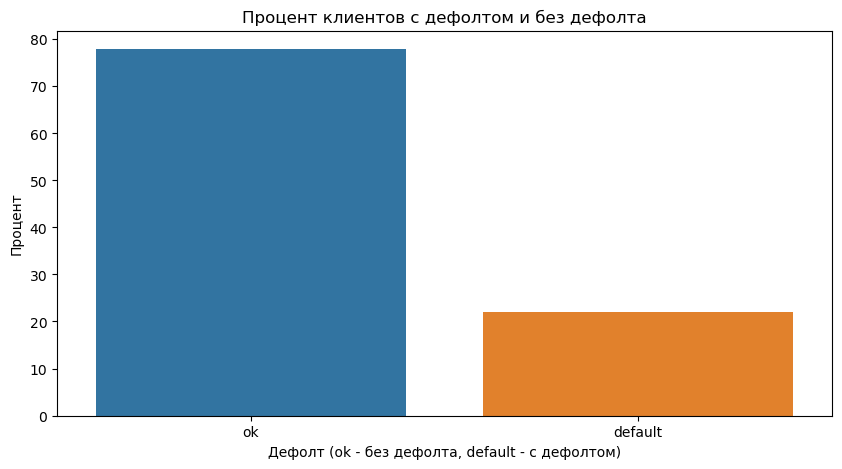

In [114]:
# Построение графика
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='default_payment_next_month', y='percent', hue='default_payment_next_month', data=norm_target)

# Настройка графика
plt.title('Процент клиентов с дефолтом и без дефолта')
plt.xlabel('Дефолт (ok - без дефолта, default - с дефолтом)')
plt.ylabel('Процент')
plt.show()

# Подготовка набора данных

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [123]:
df_train_full, df_test = train_test_split(df, test_size=0.2,random_state=RAND)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=RAND)

In [125]:
len(df_train), len(df_val), len(df_test)

(18000, 6000, 6000)

* 18000 - для обучения 
* 6000 - для тестирования и для проверки

Наша целевая переменная default_payment_next_month, ,будем предсказывать задежку выплаты, поэтому полжительным классом для нас будет _default_

In [133]:
y_train = (df_train.default_payment_next_month == 'default').values 
y_val = (df_val.default_payment_next_month == 'default').values 

In [159]:
del df_train['default_payment_next_month']
del df_val['default_payment_next_month']

In [161]:
dict_train = df_train.to_dict(orient = 'records')
dict_val = df_val.to_dict(orient = 'records')

In [163]:
dv = DictVectorizer(sparse=False)

In [165]:
X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

In [166]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [173]:
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred)

1.0

In [177]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.6131264941247317